### Imports principais

In [15]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import abs, ceil, when, mean, min, max, \
desc, to_date, col, year, from_unixtime, unix_timestamp, dayofmonth, month, datediff, concat, lit
import pandas as pd

In [2]:
dfMpdt004 = sqlContext.read.parquet("hdfs:/user/x181471/cache-hive/transacoes/credito/autorizacoes")

In [3]:
dfMpdt012 = sqlContext.read.parquet("hdfs:/user/x181471/cache-hive/contestacoes/credito/lancamento-faturado")

In [4]:
dfMpdt343 = sqlContext.read.parquet("hdfs:/user/x181471/cache-hive/transacoes/detalheAutorizacoes")

### Avaliando volumetria das tabelas

* Volumetria de transções únicas da mpdt004
* Volumetria de transções únicas da mpdt012
* Volumetria de transções únicas da mpdt343

In [5]:
dfMpdt004.count()

1184760593

In [6]:
dfMpdt012.count()

415979606

In [7]:
dfMpdt343.count()

1335110482

### Avaliando as datas minimas e máximas das tabelas

* Datas mínimas e máximas da mpdt004
* Datas mínimas e máximas da mpdt012
* Datas mínimas e máximas da mpdt343

In [8]:
dfMpdt004.columns

['idSia',
 'cartao',
 'dataHoraAutorizacao',
 'idEstabelecimento',
 'nomeEstabelecimento',
 'ramoEstabelecimentoId',
 'ramoEstabelecimentoNome',
 'maquineta',
 'modoEntradaId',
 'modoEntradaNome',
 'modoEntradaPresente',
 'pais',
 'tipoLancamento',
 'valor',
 'contcur',
 'observacoes']

In [9]:
dfMpdt012.columns

['chavePrimaria',
 'idSia',
 'numREFFAC',
 'chaveAgrupamento',
 'tipoFAC',
 'contcur',
 'observacoes']

In [10]:
dfMpdt343.columns

['idSia',
 'cartao',
 'dataHoraAutorizacao',
 'modoEntradaId',
 'modoEntradaNome',
 'modoEntradaPresente',
 'contcur',
 'valor',
 'flagContestacao',
 'flagCodigoSeguranca',
 'flagCartaoChip',
 'flagSenha',
 'observacoes']

In [11]:
dfMpdt004.select([min('dataHoraAutorizacao'),max('dataHoraAutorizacao')]).toPandas()

min(dataHoraAutorizacao) max(dataHoraAutorizacao)
0      2011-01-06 16:08:02      2016-12-31 23:59:59

In [12]:
dfMpdt012.select([min('contcur'),max('contcur')]).toPandas()

min(contcur)               max(contcur)
0 2005-02-18 10:08:08.851857 2016-08-24 23:54:09.146426

In [13]:
dfMpdt343.select([min('dataHoraAutorizacao'),max('dataHoraAutorizacao')]).toPandas()

min(dataHoraAutorizacao) max(dataHoraAutorizacao)
0               2008-01-01      2016-12-31 19:07:23

## Volumetria por mês e ano das tabelas

* Volumetria por mês e ano da mpdt004
* Volumetria por mês e ano da mpdt012
* Volumetria por mês e ano da mpdt343

### Volumetria por mês e ano da mpdt004

In [34]:
#volumetriaPorMes004 = dfMpdt004.select(concat(year(col("dataHoraAutorizacao")),
#                                                    lit("-"),
#                                                    month(col("dataHoraAutorizacao"))).alias('mes-ano')). \
#  flatMap(lambda linha: linha).countByValue()
volumetriaPorMes004 = dfMpdt004.select(from_unixtime(unix_timestamp(col("dataHoraAutorizacao")),'YYYY-MM').alias('mes-ano')). \
  flatMap(lambda linha: linha).countByValue()


In [37]:
volumetriaPorMes004Pandas = pd.DataFrame(list(volumetriaPorMes004.iteritems()),columns=['mes-ano','Quantidade']).sort('mes-ano')
volumetriaPorMes004Pandas.max(0)

/produtos/bdr/parcel/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


mes-ano         2016-12
Quantidade    163323636
dtype: object

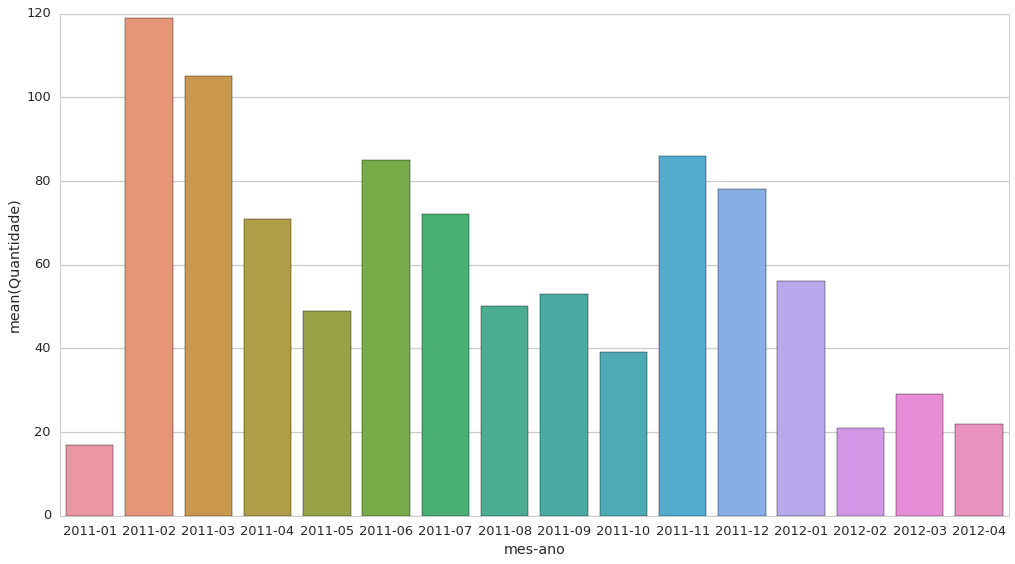

In [40]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes004Pandas.head(16))

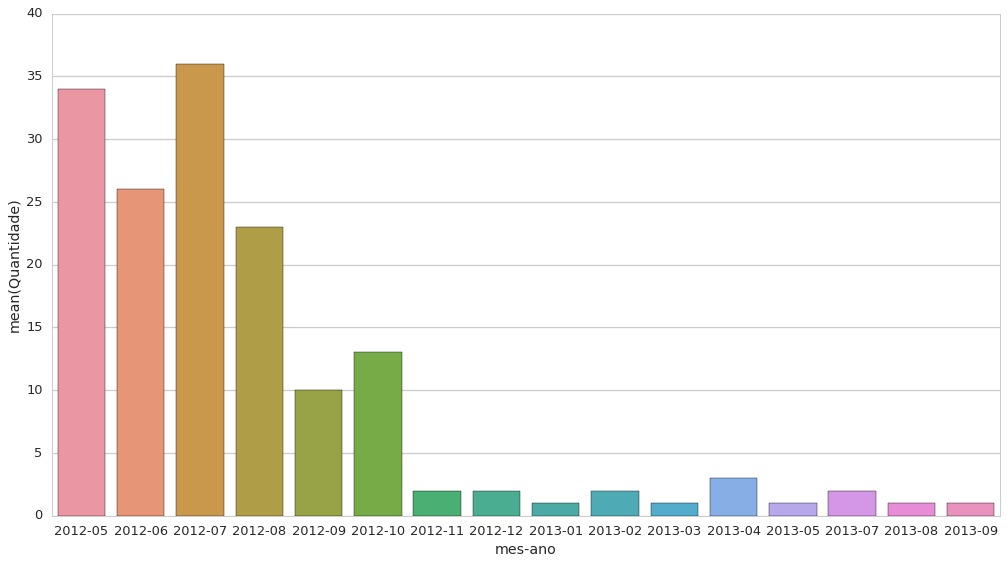

In [41]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes004Pandas.head(32)[16:])

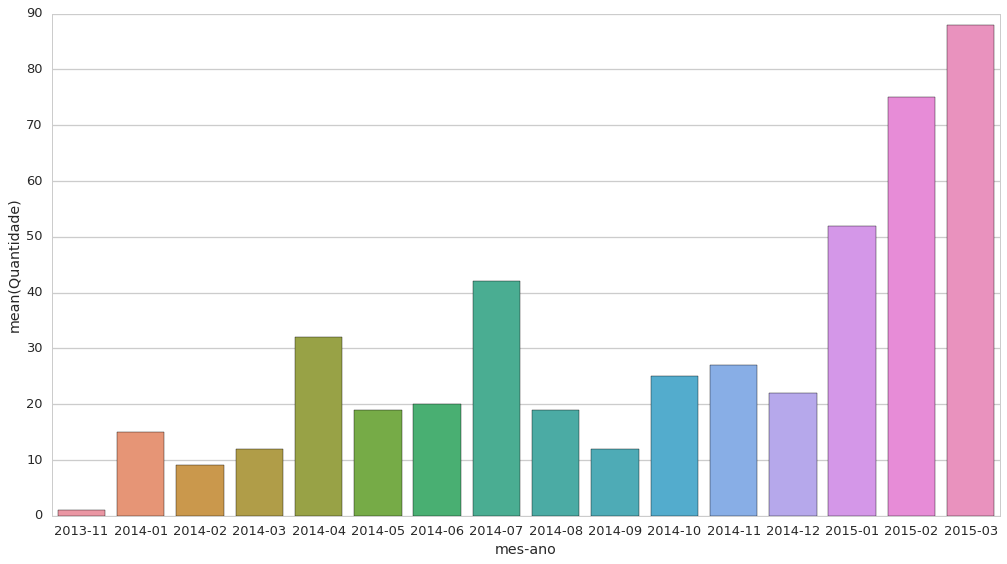

In [42]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes004Pandas.head(48)[32:])

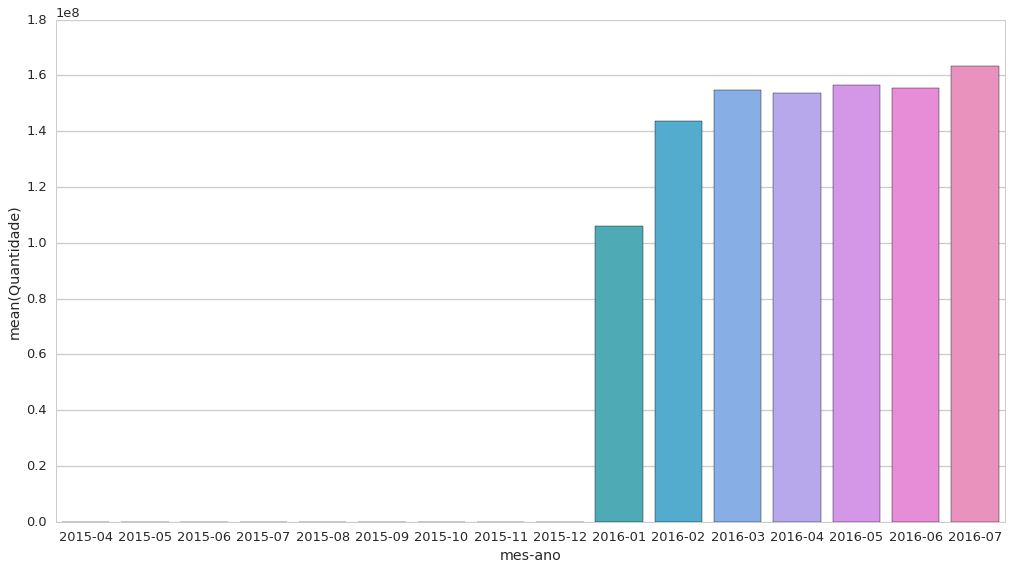

In [43]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes004Pandas.head(64)[48:])

### Volumetria por mês e ano da mpdt012

In [44]:
volumetriaPorMes012 = dfMpdt012.select(from_unixtime(unix_timestamp(col("contcur")),'YYYY-MM').alias('mes-ano')). \
  flatMap(lambda linha: linha).countByValue()

In [45]:
volumetriaPorMes012Pandas = pd.DataFrame(list(volumetriaPorMes012.iteritems()),columns=['mes-ano','Quantidade']).sort('mes-ano')
volumetriaPorMes012Pandas.max(0)

/produtos/bdr/parcel/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


mes-ano        2016-12
Quantidade    46325460
dtype: object

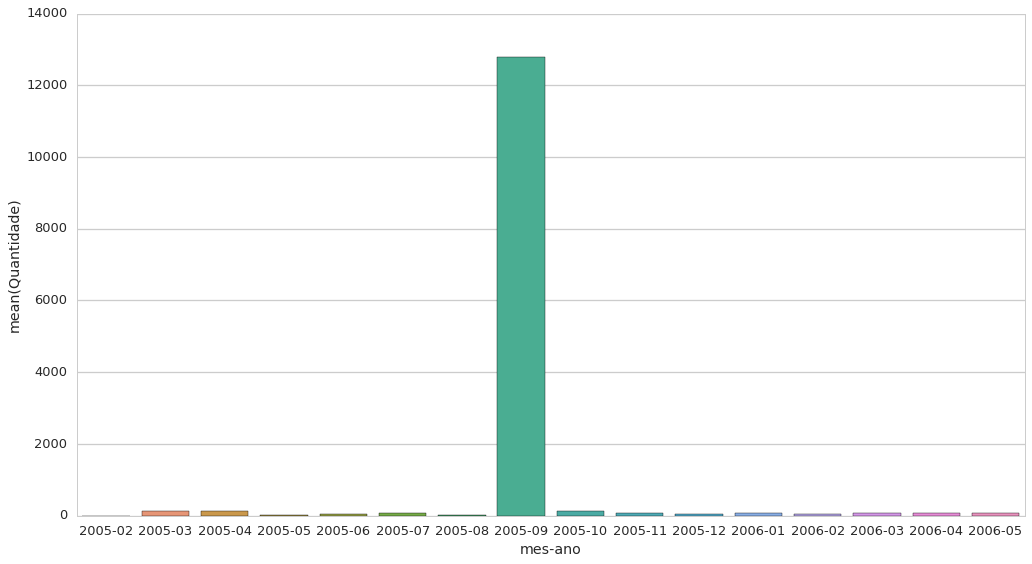

In [46]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(16))

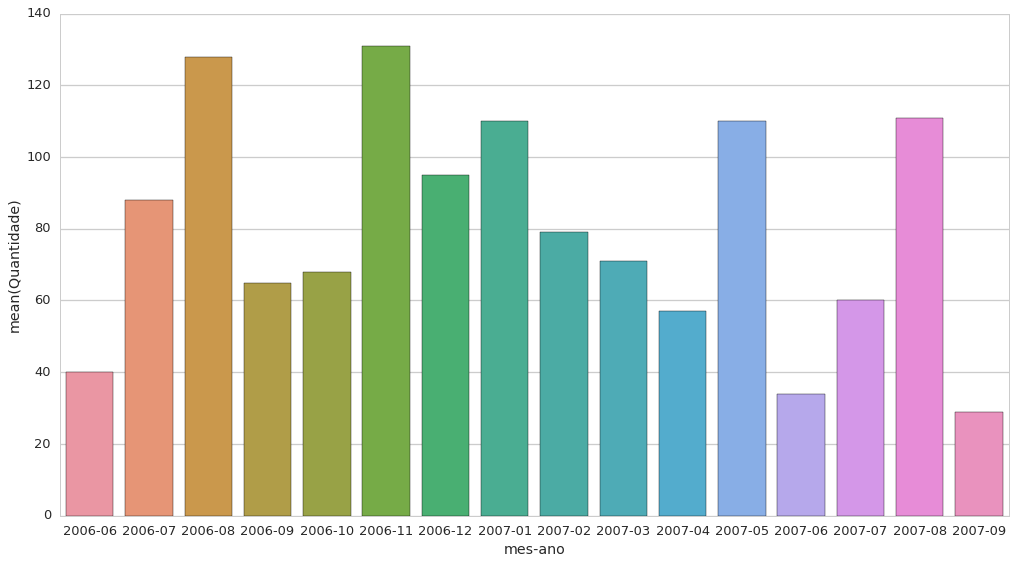

In [47]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(32)[16:])

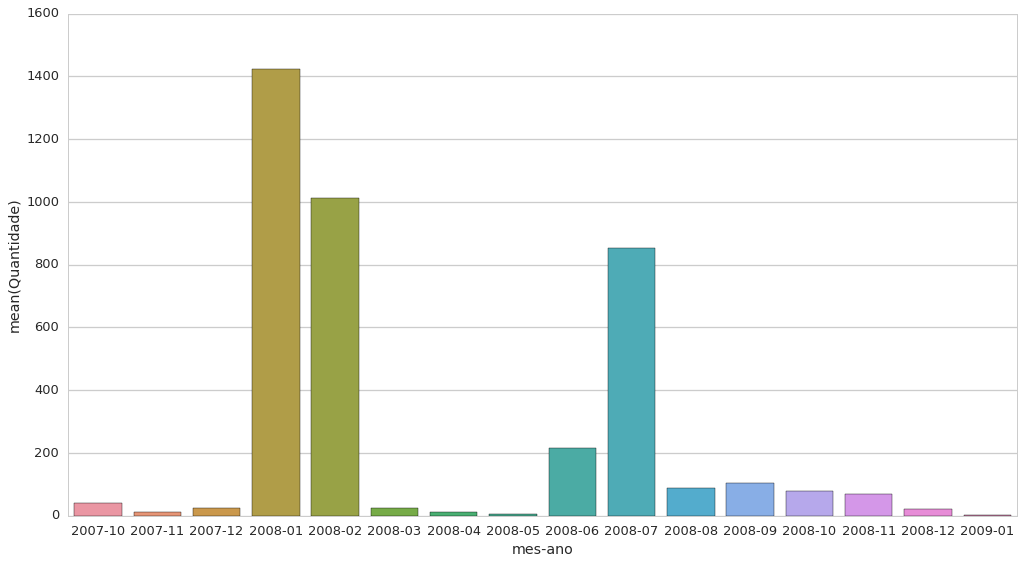

In [48]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(48)[32:])

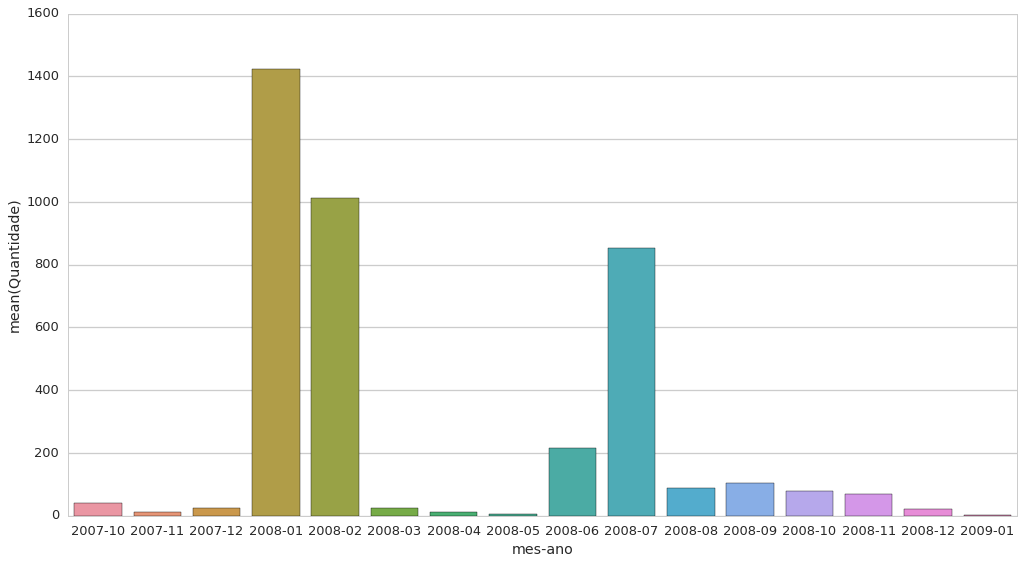

In [49]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(48)[32:])

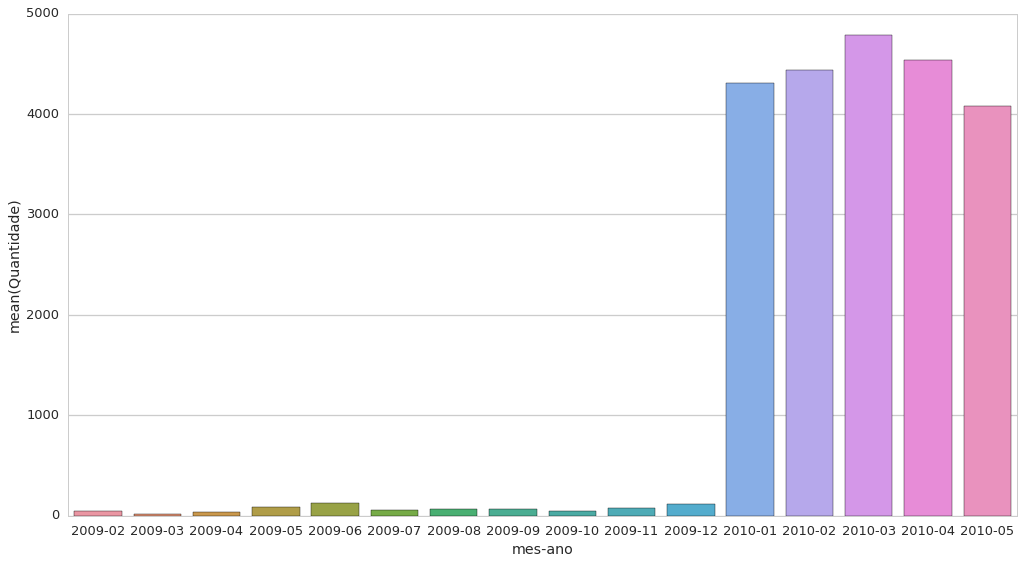

In [50]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(64)[48:])

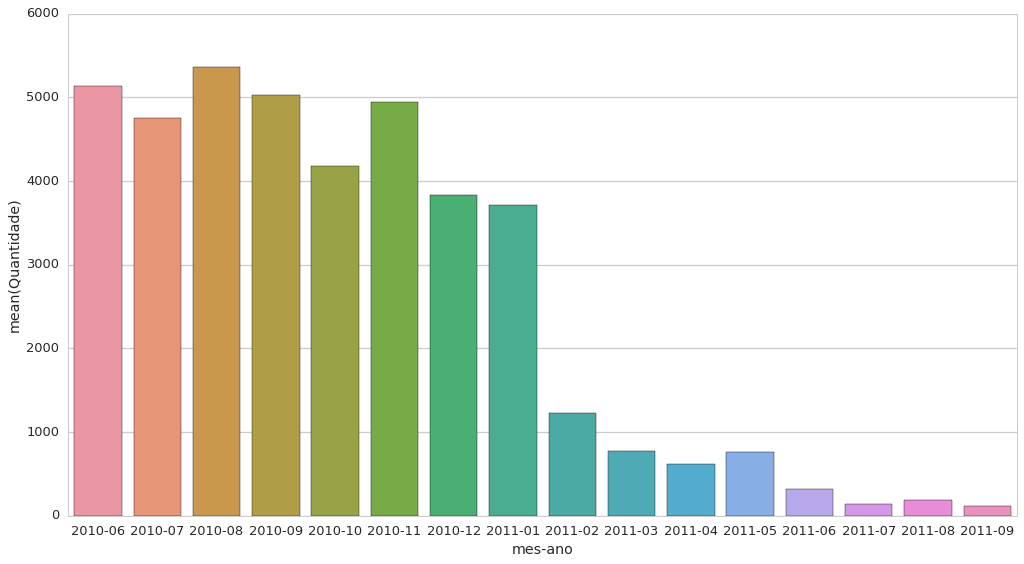

In [51]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(80)[64:])

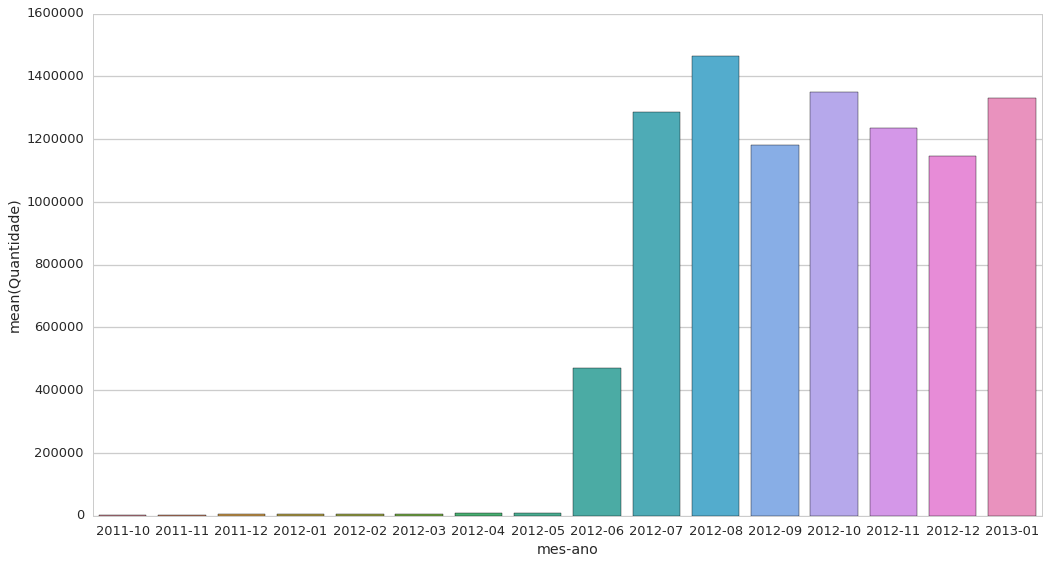

In [52]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(96)[80:])

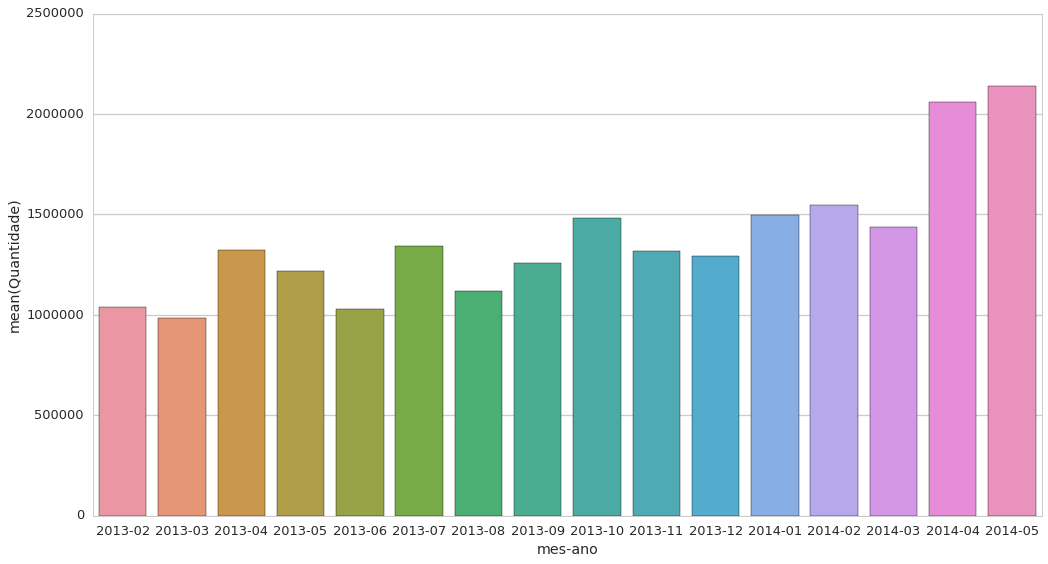

In [53]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(112)[96:])

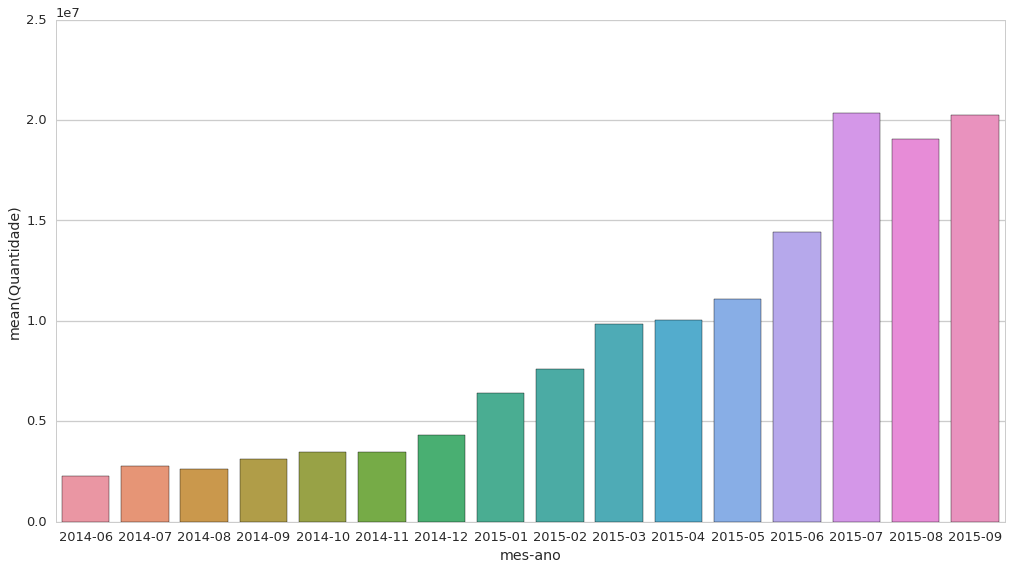

In [55]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(128)[112:])

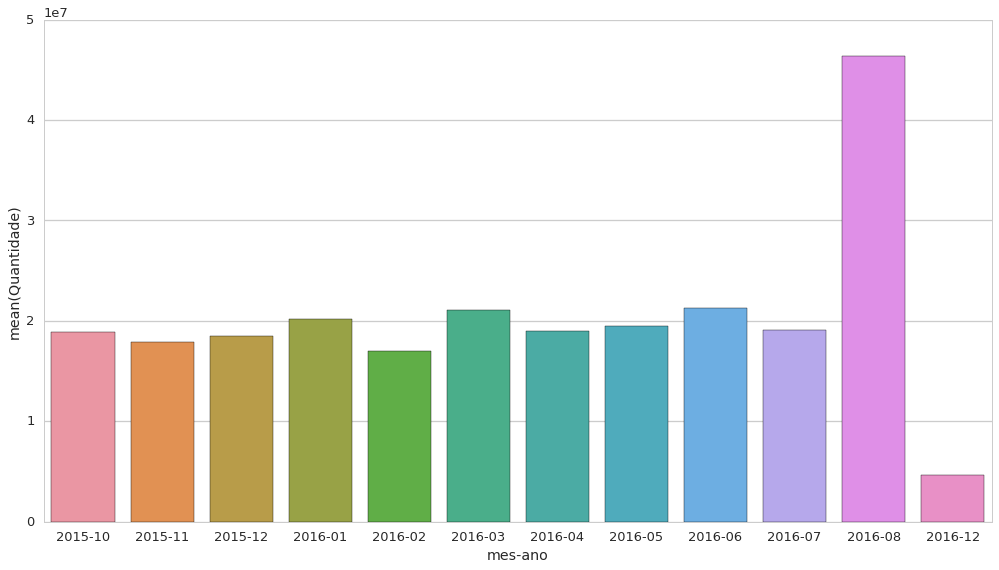

In [56]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes012Pandas.head(144)[128:])

In [58]:
volumetriaPorMes343 = dfMpdt343.select(from_unixtime(unix_timestamp(col("dataHoraAutorizacao")),'YYYY-MM').alias('mes-ano')). \
  flatMap(lambda linha: linha).countByValue()

In [59]:
volumetriaPorMes343Pandas = pd.DataFrame(list(volumetriaPorMes343.iteritems()),columns=['mes-ano','Quantidade']).sort('mes-ano')
volumetriaPorMes343Pandas.max(0)

/produtos/bdr/parcel/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


mes-ano         2016-12
Quantidade    154907224
dtype: object

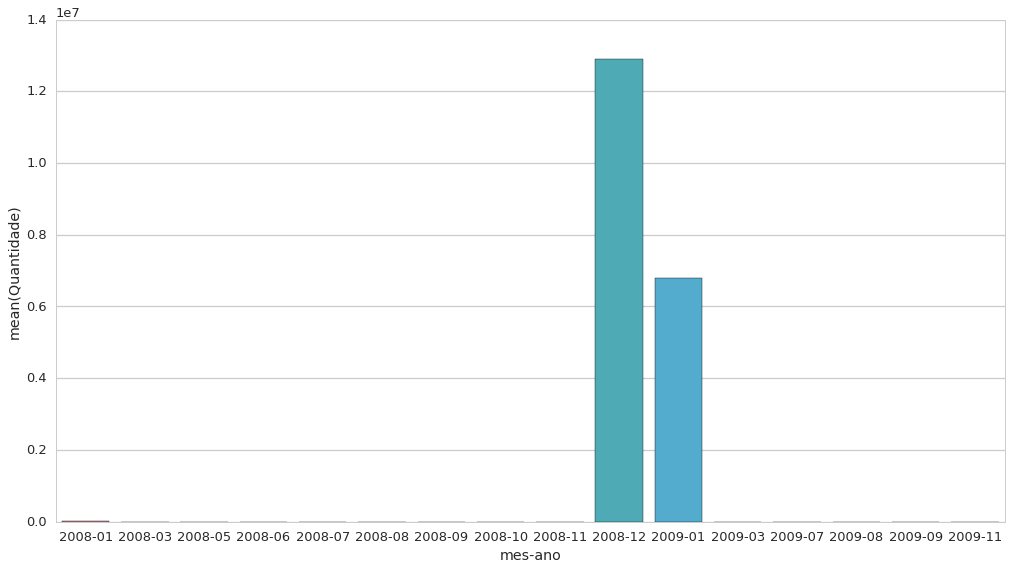

In [60]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(16))

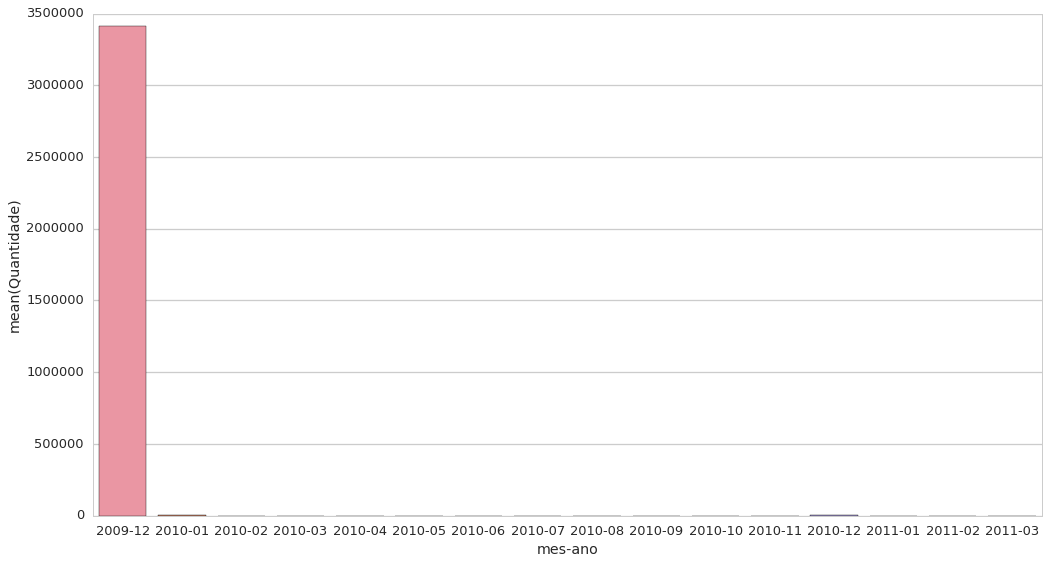

In [61]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(32)[16:])

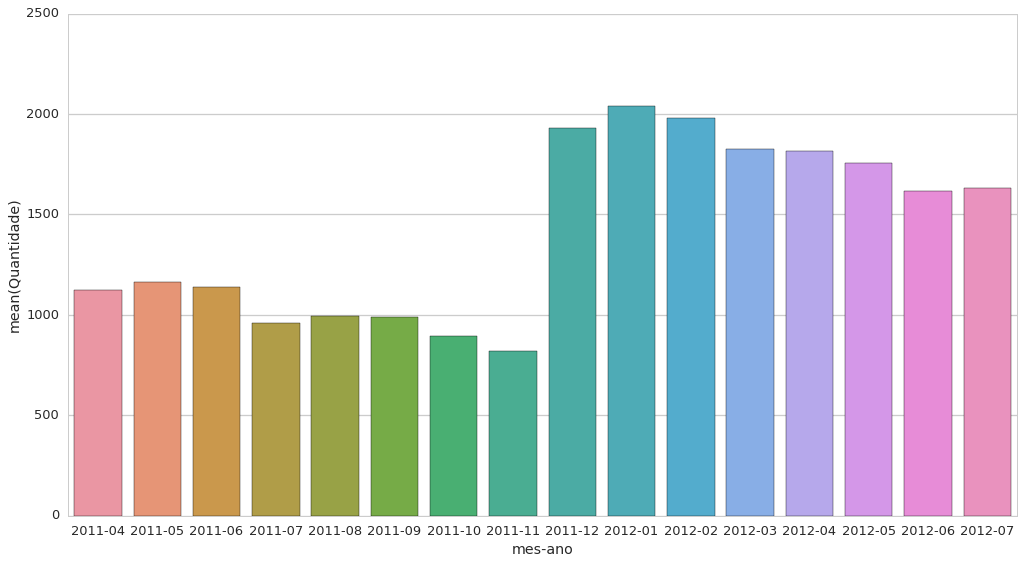

In [62]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(48)[32:])

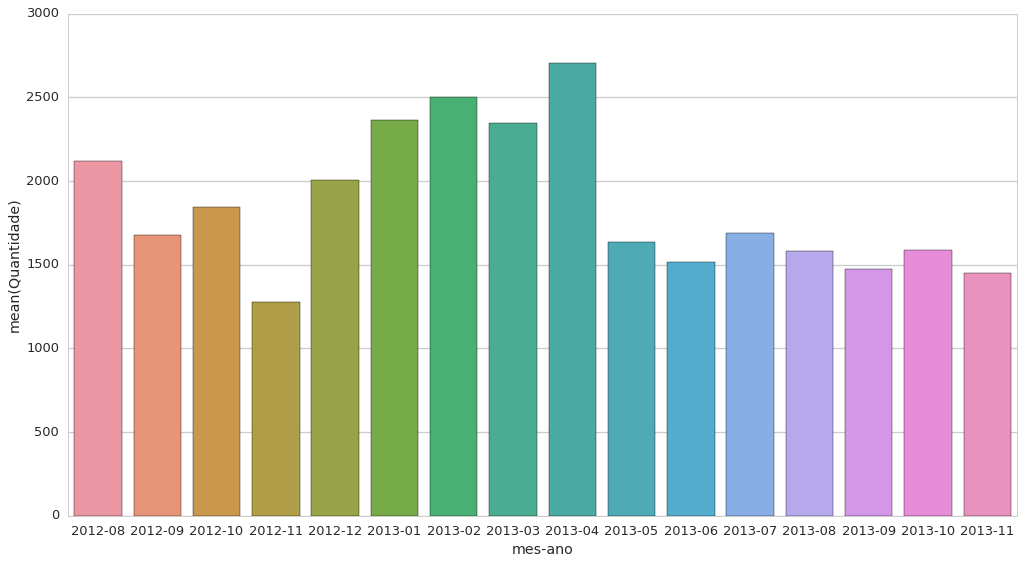

In [63]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(64)[48:])

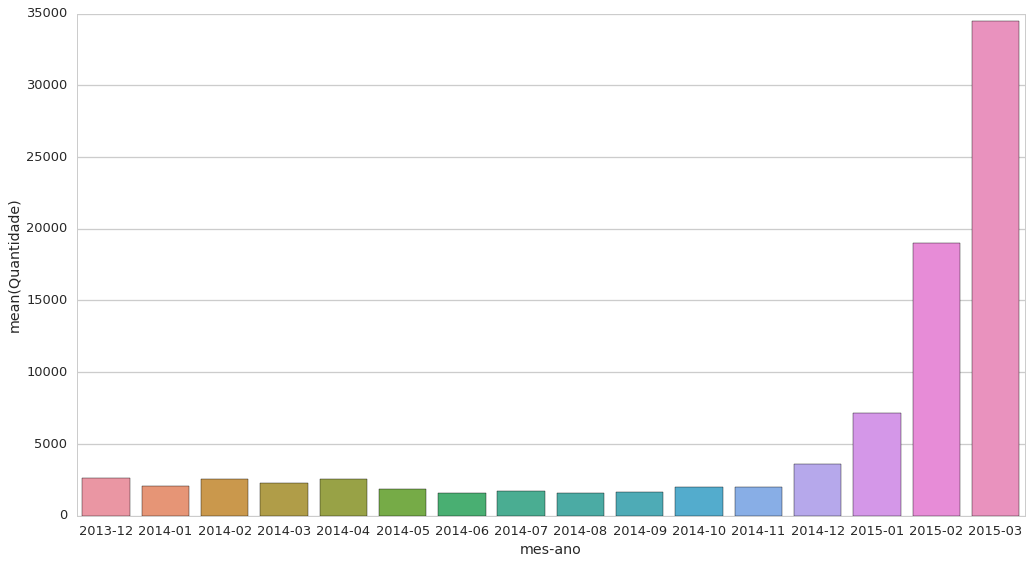

In [64]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(80)[64:])

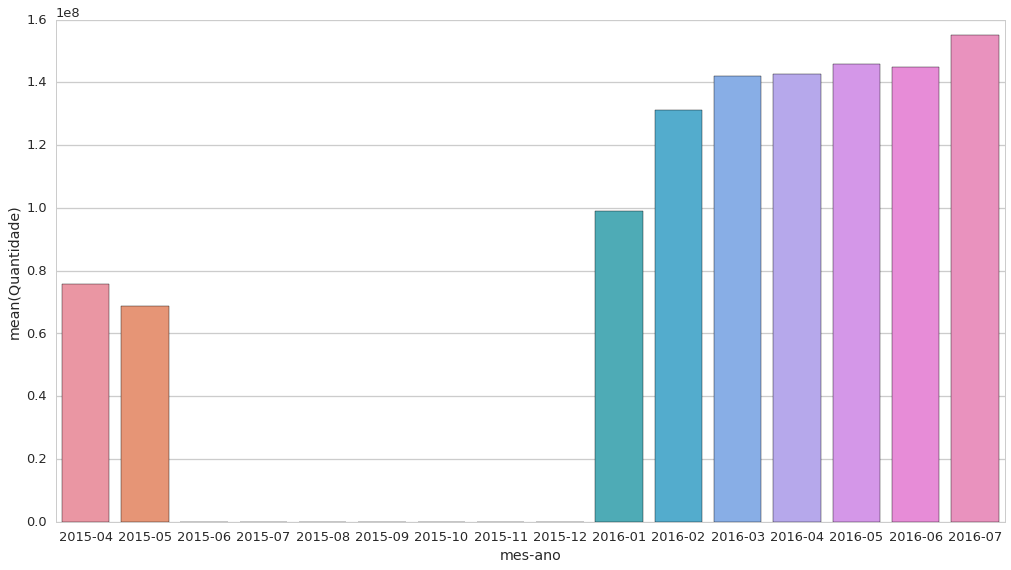

In [65]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(96)[80:])

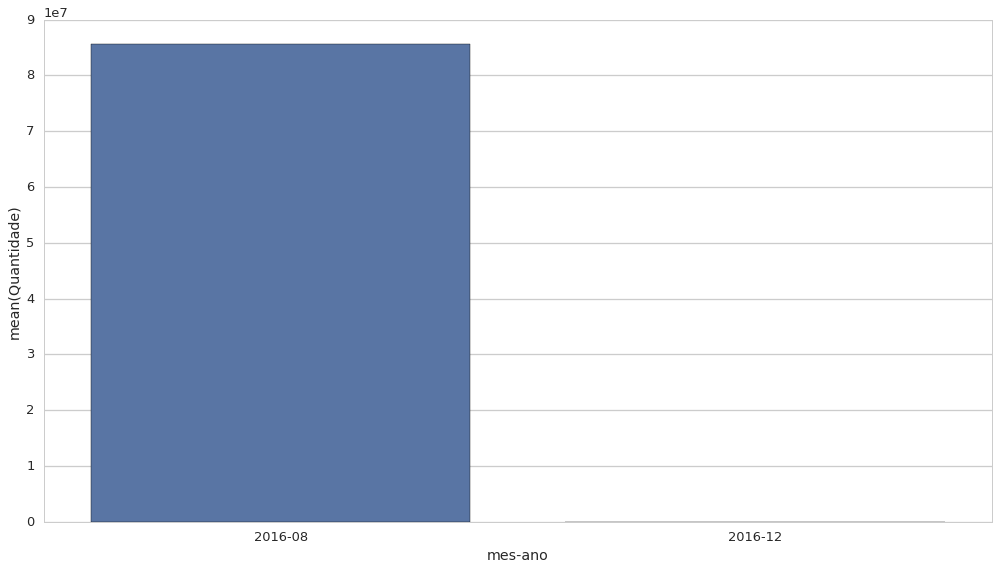

In [66]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(17, 9))
ax = sns.barplot(x="mes-ano", y="Quantidade", data=volumetriaPorMes343Pandas.head(112)[96:])